In [1]:
%matplotlib inline

<img style="float: right;", src='img/cover.jpg'/>

# visualizing discussions on twitter with networkx

kiran garimella, aalto university

michael mathioudakis, aalto university




## social media
<img style='float: right; height:300px;' src='img/social_media.jpg'/>
#### users generate digital content
status updates, blog posts, pictures, videos, reviews, ...
#### users interact
comments, likes, ratings, re-posts
#### digital traces
we can observe human interactions at global scale

<img style='float:right; width: 250px' src='img/twitter_logo.png'/>
## twitter

#### microblogging platform
users post short messages, '__tweets__'

#### since 2006, 300m + active users

#### tweets, retweets, replies

show examples of real tweets, retweets, and replies

<img style='float:left; width:250px;' src='img/trump_tweet.png'>
<img style='float:left; width:250px;' src='img/greenwald_tweet.png'>
<img style='float:left; width:250px;' src='img/leme_tweet.png'>

these are specific examples

can we learn something from the stucture of people's interactions?

we'll do that by visualizing __graphs__

graphs?

<img style='float: right; width: 350px' src='img/generic_graph.png'/>

## graphs!



#### what is a graph?

data structure

two types of elements: nodes and edges

__todo__ include an example of a very simple social network

#### what are graphs used for?
represent social connections between people ...

<img style='float: left; width: 350px' src='img/example_friends.png'/>

... or represent networks
e.g., road networks, computer networks

<img style='float: left; width: 350px' src='img/road_network.png'/>

### terminology

_graph_ vs _network_

## graphs with networkx

python library

create, process, visualize graphs

development started in 2004

mainly developed in 2014

## building a graph

<img style='float: right; width: 400px' src='img/example_friends.png'/>

let's build earlier example

<img style='float: right; height: 200px;' src='img/example_friends.png'/>

In [2]:
import networkx as nx

# initialize
graph = nx.Graph()

people = ['jere', 'ella', 'miika', 'anniina', 'mikko', 'olli', 'laura', 'maria']
connections = [('jere', 'ella'), ('ella', 'anniina'), ('ella', 'miika'),
               ('mikko', 'ella'), ('anniina', 'mikko'), ('laura', 'jere'),
               ('olli', 'jere'), ('jere', 'maria'), ('miika', 'mikko'),
               ('maria', 'laura'), ('olli', 'laura')]

# add all nodes
for node in people:
    graph.add_node(node)

# add all edges
for node_a, node_b in connections:
    graph.add_edge(node_a, node_b)


## visualizing a graph

In [3]:
def get_pyplot_ax(rows = 1, columns = 1, figsize = (7, 7)):
    """ helper function """
    
    import matplotlib.pyplot as plt
    
    fig, ax = plt.subplots(rows, columns, figsize = figsize)
    
    if rows == 1 and columns == 1:
        ax.axis('off')
    elif rows == 1 or columns == 1:
        for subax in ax:
            subax.axis('off')
    elif rows > 1 or columns > 1:
        for i in range(rows):
            for j in range(columns):
                ax[i][j].axis('off')
        
    return fig, ax

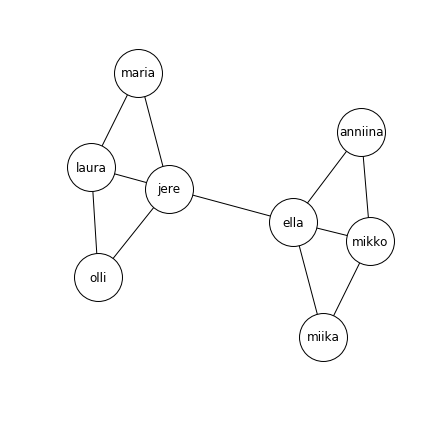

In [4]:
fig, ax = get_pyplot_ax()

nx.draw_networkx(graph, ax = ax, node_size = 2300, node_color = 'white')

fig.savefig('img/example_friends.png', dpi = 300)

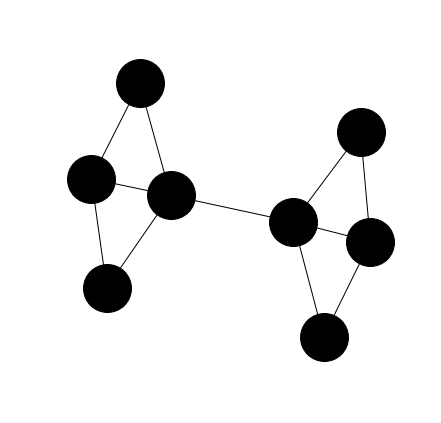

In [5]:
fig, ax = get_pyplot_ax()

nx.draw_networkx(graph, ax = ax, node_size = 2300, node_color = 'black', node_label = None)

fig.savefig('img/generic_graph.png', dpi = 300)

## add color to nodes

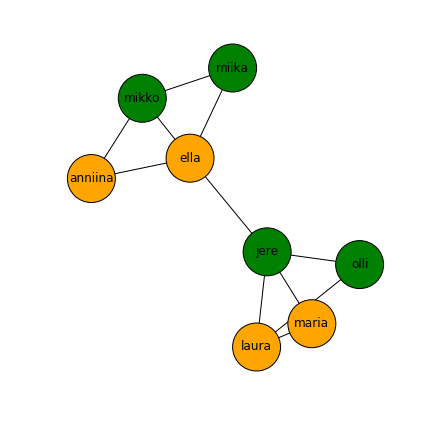

In [6]:
boy_color = 'green'
girl_color = 'orange'

color_by_gender = {
    'jere': boy_color, 'miika': boy_color, 'mikko': boy_color, 'olli': boy_color,
    'ella': girl_color, 'anniina': girl_color, 'laura': girl_color, 'maria': girl_color
}

# create a list of color per node
colors = [color_by_gender[node] for node in graph.nodes_iter()]

fig, ax = get_pyplot_ax()
nx.draw_networkx(graph, ax = ax, node_size = 2300, node_color = colors);


## custom labels

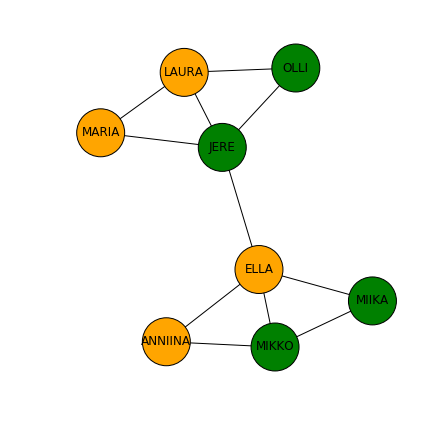

In [7]:
fig, ax = get_pyplot_ax()

labels = {}
for person in people:
    labels[person] = person.upper()
nx.draw_networkx(graph, labels = labels, ax = ax, node_size = 2300, node_color = colors);

## fixed node positions

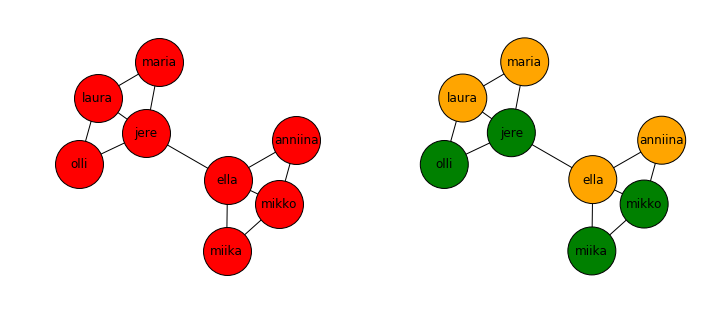

In [18]:
pos = nx.layout.spring_layout(graph)

fig, ax = get_pyplot_ax(rows = 1, columns = 2, figsize = (12, 5))

left_plot = ax[0]
right_plot = ax[1]

nx.draw_networkx(graph, pos = pos, ax = left_plot, node_size = 2300,)
nx.draw_networkx(graph, pos = pos, ax = right_plot, node_size = 2300, node_color = colors)

## analysis of a graph

### degrees

In [9]:
number_of_friends = graph.degree()

for person in number_of_friends:
    print("{} has {} friends".format(person, number_of_friends[person]))

anniina has 2 friends
ella has 4 friends
olli has 2 friends
mikko has 3 friends
maria has 2 friends
jere has 4 friends
laura has 3 friends
miika has 2 friends


### clustering

<img style='float:left; width: 400px;' src='img/example_friends.png'/>

In [10]:
from clustering import spectral_clusters
partition = spectral_clusters(graph, 2)

In [11]:
partition

array([0, 1, 1, 1, 1, 0, 0, 0], dtype=int32)

In [12]:
group_colors = []
for pos, name in enumerate(graph.nodes_iter()):
    side = partition[pos]
    color = 'blue' if side == 1 else 'grey'
    group_colors.append(color)

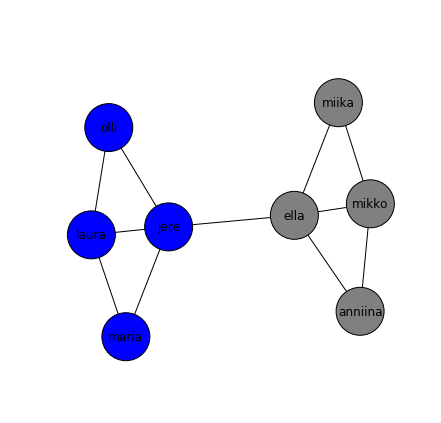

In [13]:
fig, ax = get_pyplot_ax()
nx.draw_networkx(graph, ax = ax, node_color = group_colors, node_size = 2300);

# back to twitter

* the twitter data
* retweets and replies

### dataset

* tweets collected using the streaming api (1% sample)
* can also be collected from the REST api

### a tweet

{u'contributors': None, u'coordinates': None, u'created_at': u'Fri Mar 25 11:52:14 +0000 2016', u'entities': {u'hashtags': [{u'indices': [0, 3], u'text': u'RT'}, {u'indices': [4, 11], u'text': u'Follow'}, {u'indices': [12, 23], u'text': u'TopStories'}], u'media': [{u'display_url': u'pic.twitter.com/IN2KVsc1fI', u'expanded_url': u'http://twitter.com/KTM_Riders/status/713332663755509761/photo/1', u'id': 713332663633883136, u'id_str': u'713332663633883136', u'indices': [114, 137], u'media_url': u'http://pbs.twimg.com/media/CeZERzaUsAAXPMP.jpg', u'media_url_https': u'https://pbs.twimg.com/media/CeZERzaUsAAXPMP.jpg', u'sizes': {u'large': {u'h': 683, u'resize': u'fit', u'w': 1024}, u'medium': {u'h': 400, u'resize': u'fit', u'w': 600}, u'small': {u'h': 227, u'resize': u'fit', u'w': 340}, u'thumb': {u'h': 150, u'resize': u'crop', u'w': 150}}, u'type': u'photo', u'url': u'https://t.co/IN2KVsc1fI'}], u'symbols': [], u'urls': [{u'display_url': u'bit.ly/1jyqSVe', u'expanded_url': u'http://bit.ly/1jyqSVe', u'indices': [90, 113], u'url': u'https://t.co/sAPChiEEcY'}], u'user_mentions': []}, u'extended_entities': {u'media': [{u'display_url': u'pic.twitter.com/IN2KVsc1fI', u'expanded_url': u'http://twitter.com/KTM_Riders/status/713332663755509761/photo/1', u'id': 713332663633883136, u'id_str': u'713332663633883136', u'indices': [114, 137], u'media_url': u'http://pbs.twimg.com/media/CeZERzaUsAAXPMP.jpg', u'media_url_https': u'https://pbs.twimg.com/media/CeZERzaUsAAXPMP.jpg', u'sizes': {u'large': {u'h': 683, u'resize': u'fit', u'w': 1024}, u'medium': {u'h': 400, u'resize': u'fit', u'w': 600}, u'small': {u'h': 227, u'resize': u'fit', u'w': 340}, u'thumb': {u'h': 150, u'resize': u'crop', u'w': 150}}, u'type': u'photo', u'url': u'https://t.co/IN2KVsc1fI'}]}, u'favorite_count': 0, u'favorited': False, u'filter_level': u'low', u'geo': None, u'id': 713332663755509761, u'id_str': u'713332663755509761', u'in_reply_to_screen_name': None, u'in_reply_to_status_id': None, u'in_reply_to_status_id_str': None, u'in_reply_to_user_id': None, u'in_reply_to_user_id_str': None, u'is_quote_status': False, u'lang': u'en', u'place': None, u'possibly_sensitive': False, u'retweet_count': 0, u'retweeted': False, u'source': u'<a href="http://dlvr.it" rel="nofollow">dlvr.it</a>', u'text': u"#RT #Follow #TopStories Trump Aides Plot 'Two-Phase' Strategy to Win Potential Contested\u2026 https://t.co/sAPChiEEcY https://t.co/IN2KVsc1fI", u'timestamp_ms': u'1458906734776', u'truncated': False, u'user': {u'contributors_enabled': False, u'created_at': u'Wed Jun 06 08:28:15 +0000 2012', u'default_profile': False, u'default_profile_image': False, u'description': u'The Dirt Rider Club', u'favourites_count': 0, u'follow_request_sent': None, u'followers_count': 3218, u'following': None, u'friends_count': 3782, u'geo_enabled': False, u'id': 600799231, u'id_str': u'600799231', u'is_translator': False, u'lang': u'en', u'listed_count': 110, u'location': u'North America', u'name': u'KTM Rider Club', u'notifications': None, u'profile_background_color': u'131516', u'profile_background_image_url': u'http://abs.twimg.com/images/themes/theme14/bg.gif', u'profile_background_image_url_https': u'https://abs.twimg.com/images/themes/theme14/bg.gif', u'profile_background_tile': True, u'profile_image_url': u'http://pbs.twimg.com/profile_images/2375931627/795f1dvdi168knsqo2ch_normal.jpeg', u'profile_image_url_https': u'https://pbs.twimg.com/profile_images/2375931627/795f1dvdi168knsqo2ch_normal.jpeg', u'profile_link_color': u'009999', u'profile_sidebar_border_color': u'EEEEEE', u'profile_sidebar_fill_color': u'EFEFEF', u'profile_text_color': u'333333', u'profile_use_background_image': True, u'protected': False, u'screen_name': u'KTM_Riders', u'statuses_count': 162712, u'time_zone': u'Central Time (US & Canada)', u'url': u'https://twitter.com/KTM_Riders', u'utc_offset': -18000, u'verified': False}}

### a retweet

<img style='float:right; width:400px;' src='img/trump_tweet.png'>
__original tweet author__ realDonaldTrump

__retweet author__ terry_golfing

__text__ RT @realDonaldTrump: REPEAL AND REPLACE OBAMACARE!

### a reply

<img style='float:right; width:400px;' src='img/trump_tweet.png'>
__original tweet author__ realDonaldTrump

__reply author__ tonyposnanski

__text__ @realDonaldTrump have a better plan than the one you presented

### building graph for retweets

In [14]:
dataset = []
tweet =  None
def is_retweet(tweet):
    pass
def get_retweet_author(tweet):
    pass
def get_original_author(tweet):
    pass
def contains_topic(tweet, topic):
    pass

In [15]:
topic = '#obamacare'
for tweet in dataset:
    if contains_topic(tweet, topic) and is_retweet(tweet):
        from_who = get_retweet_author(tweet)
        to_who = get_original_author(tweet)
        graph.add_edge(from_who, to_who)

### visualizations

<img style='float:left; width: 400px;' src='img/germanwings_nocolor.png'/>
<img style='float:left; width: 400px;' src='img/nepal_nocolor.png'/>
<p style="clear: both;">
<img style='float:left; width: 400px;' src='img/beefban_nocolor.png'/>
<img style='float:left; width: 400px;' src='img/russia_march_nocolor.png'/>

# what happens when people disagree?

we notice a difference...

retweet graphs for controversial topics contain two well-separated clusters

### clustering

we cluster each graph like before

In [16]:
partition = spectral_clusters(graph, 2)

to find sides __if__ they exist

### visualize with clusters

In [17]:
group_colors = []
for pos, name in enumerate(graph.nodes_iter()):
    side = partition[pos]
    color = 'blue' if side == 1 else 'red'
    group_colors.append(color)

nx.__draw_networkx__(graph, ax = ax, __node_color = group_colors__, node_size = 2300);

<img style='float:left; width: 400px;' src='img/germanwings.png'/>
<img style='float:left; width: 400px;' src='img/nepal.png'/>
<p style="clear: both;">
<img style='float:left; width: 400px;' src='img/beefban.png'/>
<img style='float:left; width: 400px;' src='img/russia_march.png'/>

# reply networks

what about reply networks?

<img style='float:left; width: 400px;' src='img/men_germanwings.png'/>
<img style='float:left; width: 400px;' src='img/men_nepal.png'/>
<p style="clear: both;">
<img style='float:left; width: 400px;' src='img/men_beefban.png'/>
<img style='float:left; width: 400px;' src='img/men_russia_march.png'/>

# summary

* __intro to networkx__ a python library to create, process, visualize graphs
* __application__ twitter discussions
    * controversial and non-controversial topics
    * retweet and reply graphs
    * retweet graphs are clearly separated for controversial topics
    * replies also from one side to the other
    * consistent pattern for many instances we've seen
* graphs can offer __insights__ into human interactions


# more about networkx

* directed graphs
* more layout algorithms
* centrality and clustering measures
* more at http://networkx.github.io/

slides at https://github.com/mmathioudakis/pycon2016polarization